<a href="https://colab.research.google.com/github/reiinakano/adversarially-robust-neural-style-transfer/blob/master/Robustness_in_AlexNet%2C_Inception%2C_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Install, Import, Load Model

In [0]:
!pip install --quiet lucid
import numpy as np
import scipy.ndimage as nd
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [2]:
def viz(model, obj, robustify):
  param_f = lambda: param.image(128, batch=4, decorrelate=robustify, fft=robustify)
  _ = render.render_vis(model, obj, param_f, transforms=None if robustify else [])

alexnet = models.AlexNet()
alexnet.load_graphdef()

inception = models.InceptionV1()
inception.load_graphdef()

vgg = models.VGG19_caffe()
vgg.load_graphdef()

W0625 13:52:45.081631 139971772962688 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/lucid/misc/io/reading.py:126: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

W0625 13:52:45.088958 139971772962688 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/lucid/misc/io/loading.py:72: The name tf.GraphDef is deprecated. Please use tf.compat.v1.GraphDef instead.



## Inception - least robust

512 958.6125



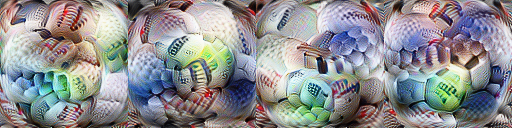

with image transformations and decorrelation
512 2056.6387



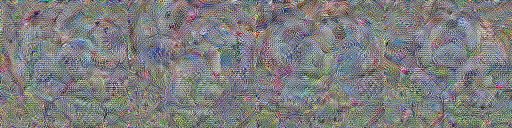

w/0 image transformations and decorrelation


In [5]:
obj = objectives.channel("mixed5a_pre_relu", 9)
viz(inception, obj, True)
print('with image transformations and decorrelation')
viz(inception, obj, False)
print('w/0 image transformations and decorrelation')

## VGG - slightly more robust

512 13999.778



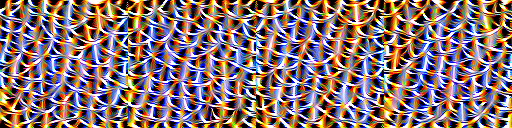

with image transformations and decorrelation
512 24701.094



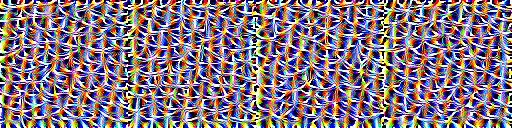

w/0 image transformations and decorrelation


In [6]:
obj = objectives.channel("conv4_1/conv4_1", 9)
viz(vgg, obj, True)
print('with image transformations and decorrelation')
viz(vgg, obj, False)
print('w/0 image transformations and decorrelation')

## AlexNet - more robust than VGG

512 274.39926



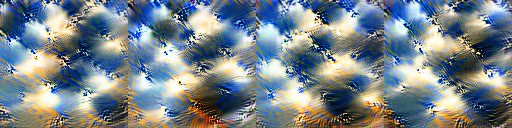

with image transformations and decorrelation
512 411.48904



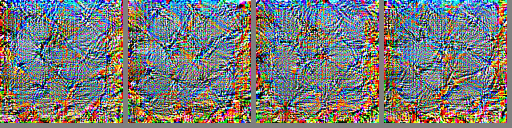

w/0 image transformations and decorrelation


In [7]:
obj = objectives.channel("conv5_1", 24)
viz(alexnet, obj, True)
print('with image transformations and decorrelation')
viz(alexnet, obj, False)
print('w/0 image transformations and decorrelation')